In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image

housing = fetch_california_housing(as_frame=True)

In [2]:
target = housing.target

In [3]:
features = housing.data[["Longitude", "Latitude"]]
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [4]:

features = housing.data[["Longitude", "Latitude"]]

In [5]:

df = pd.concat([features, target])
df


,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


In [6]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-6-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-6-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

<Axes: xlabel='Longitude', ylabel='Latitude'>

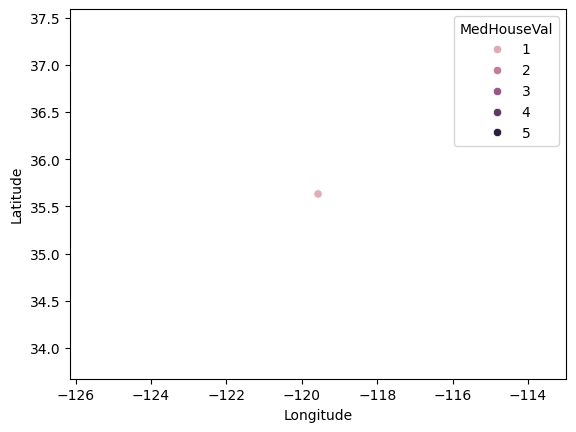

In [7]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)


In [9]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [10]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

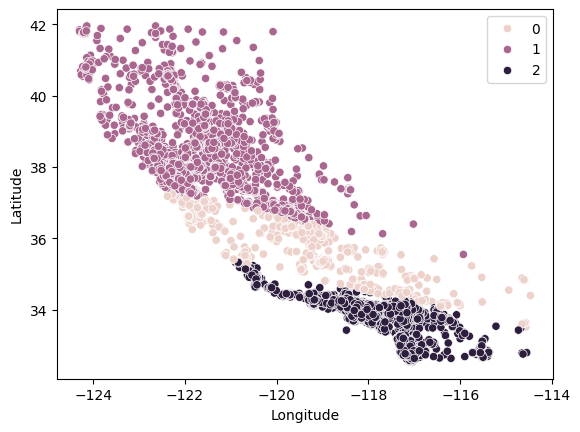

In [11]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)


Total SSE for the model: 2.060946263847614
Total SSE for the model: 0.3438324275483404
Total SSE for the model: 0.164967339112174
Total SSE for the model: 0.11625173055296804
Total SSE for the model: 0.08598854135039269
Total SSE for the model: 0.0569470126282324
Total SSE for the model: 0.039359471456935816
Total SSE for the model: 0.03135712910573645
Total SSE for the model: 0.025759783979666242
Total SSE for the model: 0.019837246099143804


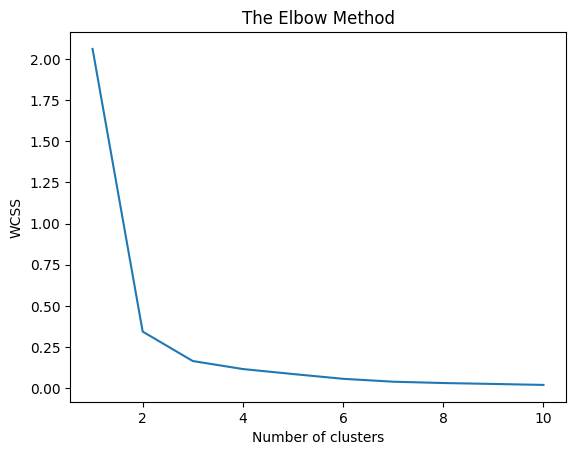

In [21]:
# prompt: use elbow method for this split

import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    sse_per_cluster = kmeans.inertia_
    print(f"Total SSE for the model: {sse_per_cluster}")




plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score: 0.7499365840241177


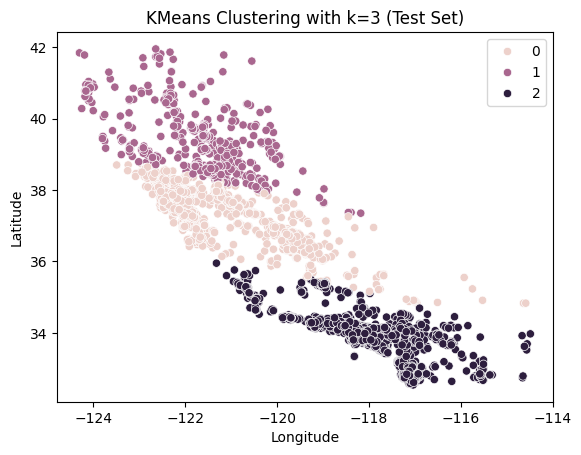

In [22]:
# prompt: retrain using the best kmeans and evaluate

# Find the optimal k based on the Elbow method (you might need to visually inspect the plot)
optimal_k = 3 # Replace with your chosen k value

# Retrain the KMeans model with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0, n_init='auto')
kmeans_optimal.fit(X_train_norm)

# Predict cluster labels for the test set
y_pred = kmeans_optimal.predict(X_test_norm)

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(X_test_norm, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

# You can also visualize the results on the test set if needed
sns.scatterplot(data = X_test, x = 'Longitude', y = 'Latitude', hue = y_pred)
plt.title(f"KMeans Clustering with k={optimal_k} (Test Set)")
plt.show()